C:\Users\Ernest\Anaconda3\envs\DIP\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


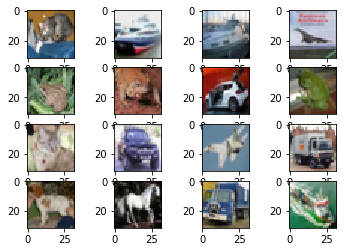

In [10]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10 
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:16])

In [2]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90, 
                 width_shift_range=0.1, height_shift_range=0.1, 
                 horizontal_flip=True) 
datagen.fit(x_train)

C:\Users\Ernest\Anaconda3\envs\DIP\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


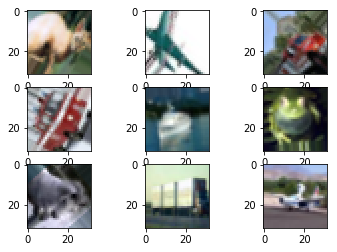

In [3]:
from matplotlib import pyplot as plt
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i].reshape(32, 32, 3)))
    # show the plot
    plt.show()
    break

In [22]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import model_from_json

In [5]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003       
    return lrate

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [15]:
num_classes = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [8]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [9]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/125
781/781 [==============================] - 599s 767ms/step - loss: 1.9060 - acc: 0.4301 - val_loss: 1.8004 - val_acc: 0.5006
Epoch 2/125
781/781 [==============================] - 597s 765ms/step - loss: 1.3129 - acc: 0.5912 - val_loss: 1.1702 - val_acc: 0.6699
Epoch 3/125
781/781 [==============================] - 594s 760ms/step - loss: 1.1575 - acc: 0.6450 - val_loss: 1.0033 - val_acc: 0.7038
Epoch 4/125
781/781 [==============================] - 592s 758ms/step - loss: 1.0399 - acc: 0.6807 - val_loss: 0.9655 - val_acc: 0.7145
Epoch 5/125
781/781 [==============================] - 602s 771ms/step - loss: 0.9649 - acc: 0.7064 - val_loss: 0.8717 - val_acc: 0.7421
Epoch 6/125
781/781 [==============================] - 593s 759ms/step - loss: 0.9114 - acc: 0.7240 - val_loss: 0.8008 - val_acc: 0.7669
Epoch 7/125
781/781 [==============================] - 599s 767ms/step - loss: 0.8731 - acc: 0.7383 - val_loss: 0.7761 - val_acc: 0.7798
Epoch 8/125
781/781 [====================

781/781 [==============================] - 600s 769ms/step - loss: 0.5906 - acc: 0.8497 - val_loss: 0.5768 - val_acc: 0.8611
Epoch 61/125
781/781 [==============================] - 602s 771ms/step - loss: 0.5861 - acc: 0.8523 - val_loss: 0.5607 - val_acc: 0.8637
Epoch 62/125
781/781 [==============================] - 600s 768ms/step - loss: 0.5885 - acc: 0.8505 - val_loss: 0.5939 - val_acc: 0.8537
Epoch 63/125
781/781 [==============================] - 597s 765ms/step - loss: 0.5869 - acc: 0.8506 - val_loss: 0.5646 - val_acc: 0.8633
Epoch 64/125
781/781 [==============================] - 600s 769ms/step - loss: 0.5878 - acc: 0.8517 - val_loss: 0.5705 - val_acc: 0.8641
Epoch 65/125
781/781 [==============================] - 601s 770ms/step - loss: 0.5798 - acc: 0.8512 - val_loss: 0.6016 - val_acc: 0.8560
Epoch 66/125
781/781 [==============================] - 598s 766ms/step - loss: 0.5888 - acc: 0.8518 - val_loss: 0.5743 - val_acc: 0.8592
Epoch 67/125
781/781 [=========================

781/781 [==============================] - 600s 768ms/step - loss: 0.4392 - acc: 0.8858 - val_loss: 0.5280 - val_acc: 0.8664
Epoch 120/125
781/781 [==============================] - 596s 763ms/step - loss: 0.4424 - acc: 0.8863 - val_loss: 0.4654 - val_acc: 0.8846
Epoch 121/125
781/781 [==============================] - 602s 770ms/step - loss: 0.4426 - acc: 0.8851 - val_loss: 0.5060 - val_acc: 0.8724
Epoch 122/125
781/781 [==============================] - 599s 767ms/step - loss: 0.4436 - acc: 0.8854 - val_loss: 0.4742 - val_acc: 0.8822
Epoch 123/125
781/781 [==============================] - 598s 766ms/step - loss: 0.4441 - acc: 0.8850 - val_loss: 0.4490 - val_acc: 0.8871
Epoch 124/125
781/781 [==============================] - 600s 768ms/step - loss: 0.4396 - acc: 0.8846 - val_loss: 0.4917 - val_acc: 0.8800
Epoch 125/125
781/781 [==============================] - 599s 767ms/step - loss: 0.4388 - acc: 0.8872 - val_loss: 0.5114 - val_acc: 0.8710


In [18]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 
  
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 49s 5ms/step

Test result: 14.290 loss: 13.847


C:\Users\Ernest\Anaconda3\envs\DIP\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


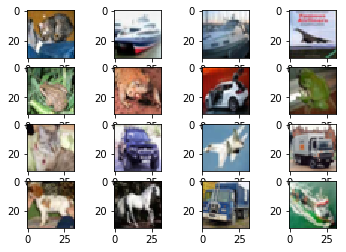

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']


In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
show_imgs(x_test[:16])
 
# Load trained CNN model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:16]),1)
print ([labels[x] for x in indices])